In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz as az
az.style.use('arviz-darkgrid')

In [6]:
pKa = pd.read_csv('pKa.txt', sep='\t')
pKa['delta'] = pKa.nativa - pKa.mirror

pKad = pd.read_csv('pKad.txt', sep='\t')
pKad['delta'] = pKad.nativa - pKad.mirror

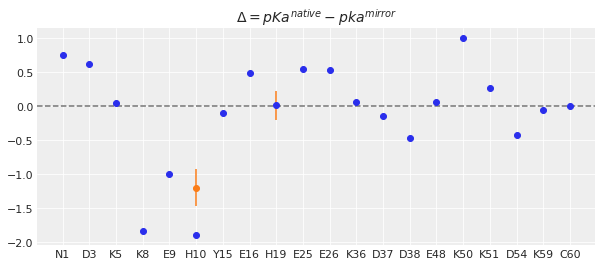

In [7]:
plt.figure(figsize=(10, 4))
delta = pKa.delta.values
deltad = pKad.delta.values
plt.axhline(0, 0, 1, ls='--', color='0.45')
plt.plot(delta, 'o')
plt.plot(5, deltad, 'o')
#plt.plot(8, 0, 'C1o', mec='C1', mfc='None')
#plt.plot([], alpha=0, label=r'$\Delta = pKa^{native} - pkA^{mirror}$')
e_0 = (0.21**2 + 0.18**2)**0.5
e_1 = (0.15**2 + 0.15**2)**0.5
plt.vlines(5, deltad-e_0, deltad+e_0, colors='C1')
plt.vlines(8, -e_1, e_1, colors='C1')

plt.xticks(pKa['aa'].index, pKa['aa'].values);
plt.title(r'$\Delta = pKa^{native} - pka^{mirror}$');
plt.savefig('Delta_pKa.png', dpi=300)

In [8]:
H10_d_Native = pd.read_csv('H10Delta_Native.txt', sep='\s+', header=None)
rango = H10_d_Native[3].values
H10_d_nat = H10_d_Native[5].values

H10_p_Native = pd.read_csv('H+10_Native.txt', sep='\s+', header=None)
H10_p_nat = H10_p_Native[6].values

H10_e_Native = pd.read_csv('H10eps_Native.txt', sep='\s+', header=None)
H10_e_nat = H10_e_Native[5].values

H10_d_Mirror = pd.read_csv('H10Delta_Mirror.txt', sep='\s+', header=None)
H10_d_mir = H10_d_Mirror[5].values

H10_p_Mirror = pd.read_csv('H+10_Mirror.txt', sep='\s+', header=None)
H10_p_mir = H10_p_Mirror[6].values

H10_e_Mirror = pd.read_csv('H10eps_Mirror.txt', sep='\s+', header=None)
H10_e_mir = H10_e_Mirror[5].values

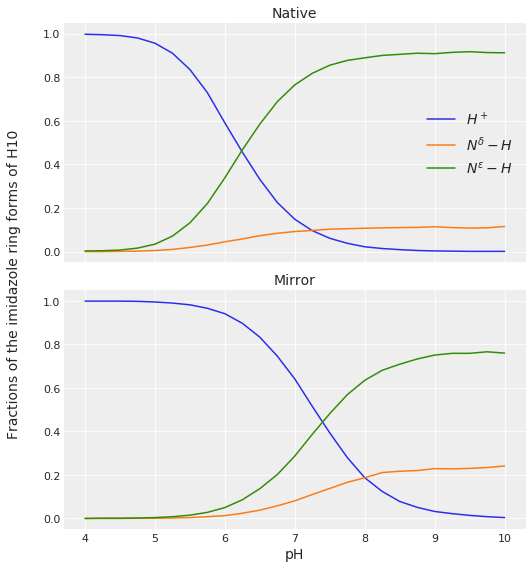

In [84]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 8))

ax[0].plot(rango, H10_p_nat, label='$H^+$')
ax[0].plot(rango, H10_d_nat, label='$N^{\delta}-H$')
ax[0].plot(rango, H10_e_nat, label='$N^{\epsilon}-H$')
ax[0].legend(fontsize=14)
ax[0].set_title('Native')


ax[1].plot(rango, H10_p_mir)
ax[1].plot(rango, H10_d_mir)
ax[1].plot(rango, H10_e_mir)
ax[1].set_title('Mirror')

plt.xlabel('pH')
fig.text(-0.05, 0.75, 'Fractions of the imidazole ring forms of H10',
         rotation=90, fontsize=14)
plt.tight_layout()
plt.savefig('Fractions.png', dpi=300)